In [20]:
import numpy as np
import pandas as pd

In [3]:
bmi = pd.read_csv("BMI.csv")
bmi = bmi.replace(to_replace = "Male", value = 0)
bmi = bmi.replace(to_replace = "Female", value = 1)
bmi.head()

,Gender,Height,Weight,Index
0,0,174,96,4
1,0,189,87,2
2,1,185,110,4
3,1,195,104,3
4,0,149,61,3


In [4]:
from sklearn.model_selection import train_test_split

In [6]:
X = bmi.drop("Index", axis = 1)
y = bmi["Index"].copy()
X.shape

(500, 3)

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1,random_state = 42)
print("X_train_size:", len(X_train), "\nX_test_size", len(X_test), "\nY_train_size", len(y_train),"\nY_test_size",len(y_test))

X_train_size: 450 
X_test_size 50 
Y_train_size 450 
Y_test_size 50


In [9]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

/home/ayushi/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/ayushi/anaconda3/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/home/ayushi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.


In [10]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [15]:
some_data = X_test[ :5]
some_labels = y_test.iloc[ :5]
print("Predictions:", lin_reg.predict(some_data).round())

Predictions: [4. 2. 3. 3. 4.]


In [16]:
print("Labels:",list(some_labels))

Labels: [4, 2, 4, 4, 4]


In [17]:
bmi_predictions = lin_reg.predict(X_test)

In [22]:
from sklearn.metrics import mean_squared_error 
lin_mse = mean_squared_error(y_test, bmi_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

0.5438300031074301

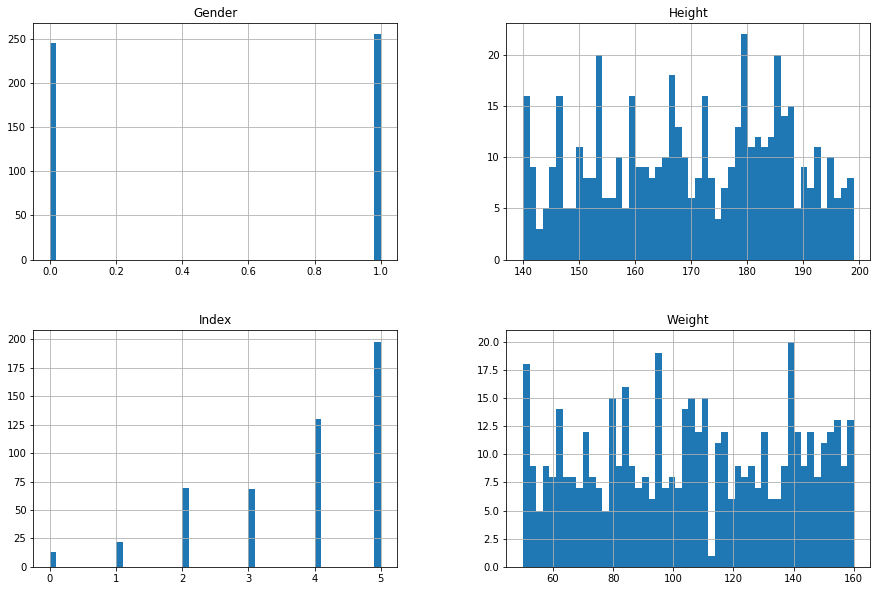

In [23]:
%matplotlib inline
import matplotlib.pyplot as plt
bmi.hist(bins = 50, figsize = (15,10))
plt.show()

In [24]:
bmi.corr()

,Gender,Height,Weight,Index
Gender,1.000000,0.017677,-0.009523,-0.028786
Height,0.017677,1.000000,0.000446,-0.422223
Weight,-0.009523,0.000446,1.000000,0.804569
Index,-0.028786,-0.422223,0.804569,1.000000


In [27]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(lin_reg, X, y, scoring = "neg_mean_squared_error", cv =10)
lin_rmse_scores = np.sqrt(-scores)

def display_scores(scores):
    print("Scores:",scores)
    print("Mean",scores.mean())
    print("Standard Deviation:",scores.std())

display_scores(lin_rmse_scores)

Scores: [0.51086223 0.64882852 0.55594447 0.44200509 0.690216   0.61295734
 0.49290577 0.54831692 0.53895521 0.61487737]
Mean 0.5655868914102031
Standard Deviation: 0.07196204700565358


In [28]:
from sklearn.metrics import r2_score
r2_score(y_test, bmi_predictions.round())

0.6657115568290353

In [29]:
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor()
tree_reg.fit(X_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [30]:
bmi_predictions_tree = tree_reg.predict(X_test)
r2_score(y_test, bmi_predictions_tree)

0.7612225405921681

In [33]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor()
forest_reg.fit(X_train,y_train)
bmi_predictions_forest = forest_reg.predict(X_test)
r2_score(y_test, bmi_predictions_forest.round())

/home/ayushi/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.9363260108245781

In [34]:
from sklearn.svm import SVR
svr_reg = SVR()
svr_reg.fit(X_train, y_train)
bmi_predictions_svr = svr_reg.predict(X_test)
r2_score(y_test, bmi_predictions_svr.round())


0.9204075135307227

In [35]:
svr_regl = SVR(kernel = "linear")
svr_regl.fit(X_train, y_train)
bmi_predictions_svrl = svr_regl.predict(X_test)
r2_score(y_test, bmi_predictions_svrl.round())

0.6497930595351799

In [38]:
from sklearn.externals import joblib

joblib.dump(lin_reg, "lin_reg.pkl")
joblib.dump(tree_reg, "tree_reg.pkl")
joblib.dump(forest_reg, "forest_reg.pkl")
joblib.dump(svr_reg, "svr_reg.pkl")
joblib.dump(svr_regl, "svr_regl.pkl")

['svr_regl.pkl']